(prob-models)=
# Probabilistic graphical models

This is the third of the four-chapter sequence described in {numref}`Chapter %s <halfway>` aimed at building and training _probabilistic graphical models_ (*PGM*s) on datasets. This chapter is devoted toward the definition of general PGMs and building up a modest collection of examples.

As the terminology indicates, each PGM is based on an underlying graph, consisting of directed edges (i.e., arrows) connecting a network of nodes. In our formulation, the nodes represent either random or deterministic vectors, and the edges represent flows of "information" or "influence." Between two _random_ vectors, such a directed flow is modeled as the _communication channel_ (in the sense of {prf:ref}`comm-channel-def` and {prf:ref}`conditional-markov-kernel-thm`) induced by the conditional probability distribution of the random vectors---but, as we know, this communication channel is reversible via Bayes' theorem, and so the direction of the edge between the random vectors singles out one link over the other. This distinguished direction is often chosen because it represents a natural cause-and-effect relationship. This leads to a _causal_ interpretation of the underlying graphs of PGMs, which we briefly describe in {numref}`causal`. Our description of such _causal structures_ is extraordinarily brief, intended only for motivation. To learn more about the formal theory of causality, we direct the reader toward the introductions in Chapter 9 of {cite}`HardtRecht2022` and Chapter 36 of {cite}`Murphy2023`, and to {cite}`Pearl2009` for a comprehensive treatment.

The general definition of a PGM comes afterward in {numref}`general-pgm-sec`. Our definition slightly extends the one often found in the literature, as we allow deterministic variables in the graphical structure that do not carry probability distributions.

The remaining three sections in the chapter study three special classes of PGMs, beginning with _linear regression models_ in {numref}`lin-reg-sec`. These models are used in situations where we believe one feature in a dataset is (approximately) an affine function of some other subset of features. Then, in {numref}`log-reg-sec`, we turn toward _logistic regression models_, which are used in binary classification problems. Finally, in {numref}`nn-sec`, we get a brief glimpse into the fascinating world of _deep learning_, based on _neural network models_. We will study the most basic version of these models, so-called _fully-connected, feedforward neural networks_ or _multilayer perceptrons_. Our treatment here is also extraordinarily brief---the interested reader is directed toward {cite}`GBC2016` for an authoritative treatment of deep learning and neural networks.

(causal)=
## A brief look at causal inference

Suppose that we are given two random variables $X$ and $Y$. As we explained in {numref}`cond-entropy-mutual-info-sec`, the two-way flow of "information" and "influence" between the random variables is conceptualized via the Markov kernels

$$
x\mapsto p(y|x) \quad \text{and} \quad y \mapsto p(x|y)
$$

given by the conditional distributions, which are both directly obtainable from the joint distribution of $X$ and $Y$. Mathematically, one may reverse the direction of the flow and obtain one Markov kernel from the other via Bayes' theorem; thus, as long as we have access to the joint distribution, there is no _a priori_ reason to prefer one direction over the other.

But there are very often situations in the real world where one of the directions of flow is more "natural," or at least easier to conceptualize, due to the two variables occurring in a cause and effect relationship. For example, in the case that $X$ and $Y$ are binary variables indicating the presence of a disease ($X$) and whether a test for the disease is positive ($Y$), we more naturally assume that the flow of influence goes from $X$ to $Y$, and not the other way around. Graphically, we might represent the situation as:

&nbsp;
```{image} ../img/stochastic-link.svg
:width: 25%
:align: center
```
&nbsp;

So, the arrow represents more than just the flow of information along the Markov kernel $x\mapsto p(x|y)$; by drawing $\rightarrow$ and not the reverse $\leftarrow$, we indicate that $X$ is the _cause_ and $Y$ is the _effect_.

Continuing with this example, imagine that we've collected data

$$
(x_1,y_1),(x_2,y_2),\ldots,(x_{10{,}000}, y_{10{,}000})
$$

on $10{,}000$ patients, where $x_i$ and $y_i$ indicate if the $i$-th patient has the disease and has tested positive for it. Then there is _absolutely nothing_ inherent or intrinsic to the dataset sufficient to determine the directionality of the cause and effect relationship between $X$ and $Y$. All the sample-based statistics that we may compute are derived from the empirical mass function, which is just a collection of relative frequencies. These statistics include the empirical correlation coefficient and the empirical mutual information, both of which will certainly be positive---but correlation is not the same as causation, as we are always warned, and so the data by itself tells us nothing about the causal relationship.

For another example, suppose that $U$ and $W$ are the proportions of people in a city that use an umbrella on a given day ($U$) and run their windshield wipers ($W$) on their drive to work. Then certainly $U$ and $W$ are positively correlated, but we would be quite skeptical if someone tried to convince us that the cause and effect relationship went like this:

&nbsp;
```{image} ../img/confounding-01.svg
:width: 25%
:align: center
```
&nbsp;

Indeed, the statistical correlation is not a result of a direct cause and effect relationship between the variables, but rather it is a result of the presence of a _confounding variable_ $R$, indicating whether it rained on the given day, and which serves as a common cause of both $U$ and $W$. Then the proper cause and effect relationships would be indicated by the graph:

&nbsp;
```{image} ../img/confounding-02.svg
:width: 25%
:align: center
```
&nbsp;

```{margin}

It is important to remember that the directionality of the causal relationship does _not_ indicate that there is no flow of information backward from effect to cause. The communication channel is still reversible via Bayes' theorem! These transfers of information against the directionality indicated by the causal structure are sometimes called _backdoor paths_.
```

In this situation, the correlation between $U$ and $W$ will vanish if we condition on $R$; this just means that the only way information flows from $U$ to $W$ is through $R$, and if we know what value $R$ takes, then this flow of information is cut off.  So, using the language introduced in {numref}`cond-entropy-mutual-info-sec`, the casual relationships indicated by the graph show that $U$ and $W$ are conditionally independent given $R$. Importantly, this independence would be detectable by observation, via the factorization of the empirical (conditional) joint mass function into the product of the empirical (conditional) marginal mass functions.

But recall from our discussion in {numref}`cond-entropy-mutual-info-sec` that conditional independence also occurs when the variables are configured in a chain

&nbsp;
```{image} ../img/mediator.svg
:width: 45%
:align: center
```
&nbsp;

with $R$ serving as a _mediating variable_ rather than a confounding one. Since the only insight obtainable from observed data is independence, the data itself does not express a preference between the first causal structure with $R$ a confounding variable and the second one with $R$ a mediator. The causal structure would need to be determined some other way, beyond observation.

We may summarize the discussion in any one of the following ways:

> **Causal structures and probability**.
> * Relationships of cause and effect represent strictly more structure than a joint probability distribution.
> * A causal structure _refines_ a joint probability distribution; it encodes _more_ knowledge.
> * The mapping from causal structures to joint probability distributions is many-to-one.

The very simple types of graphs that we have drawn to represent causal structures are called _causal graphs_ in the literature; they are graphical representations of _structural causal models_. We will use identical graphs to represent _probabilistic graphical models_ (*PGM*s) throughout the rest of this book. Essentially, a PGM represents a factorization of a joint probability function into products of conditional and marginal probability functions based on the structure of the underlying graph---but different graphs may represent the same joint distribution and the same factorization. So, strictly speaking, a PGM is more than just a probabilistic object. When we draw its underlying causal graph with arrows pointing one way and not the other, we are indicating what we believe are the "natural" directions of flow of information or influence, or at least just the directed links of communication that we choose to model directly. The links pointing in the opposite directions are modeled indirectly, via Bayes' theorem.

```{admonition} Problem Prompt

Do problem 1 on the worksheet.
```













(general-pgm-sec)=
## General probabilistic graphical models

By way of introduction, let's begin with two deterministic vectors $\bx\in \bbr^n$ and $\by \in \bbr^m$. As we discussed at the beginning of {numref}`cond-entropy-mutual-info-sec`, by saying that there is a _deterministic flow of information_ from $\bx$ to $\by$, we shall mean simply that there is a function

```{margin}

The terminology _link function_ is used in the theory of [generalized linear models](https://en.wikipedia.org/wiki/Generalized_linear_model). It is used here in a different (but still somewhat conceptually similar) fashion.
```

$$
g: \bbr^n \to \bbr^m, \quad \by = g(\bx),
$$

called a _link function_. It will be convenient to depict this situation graphically by representing the variables $\bx$ and $\by$ as nodes in a [graph](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)) and the link function $g$ as an arrow between them:

```{image} ../img/det-link.svg
:width: 25%
:align: center
```
&nbsp;

Very often, the label $g$ on the link function will be omitted. In the case that both $\bx$ and $\by$ are $1$-dimensional, we visualized a deterministic flow like this:

```{image} ../img/det-kernel.svg
:width: 85%
:align: center
```
&nbsp;

It could be the case that flow of influence is parametrized. For example, $g$ might be a linear transformation that is represented by a matrix $\bA \in \bbr^{m\times n}$, with the entries in the matrix serving as parameters for the flow. We would represent this situation as

```{image} ../img/det-link-2.svg
:width: 25%
:align: center
```
&nbsp;

where the parameter matrix is represented by an un-circled node.

For a more complex example, consider the following graph:

```{image} ../img/det-link-3.svg
:width: 25%
:align: center
```
&nbsp;

This might represent a link function of the form

$$
\bz = \bA \bx + \bB \by, \quad \bx \in \bbr^{n}, \ \by\in \bbr^{k}, \ \bz \in \bbr^{m},
$$

which is parametrized by matrices $\bA \in \bbr^{m\times n}$ and $\bB \in \bbr^{m\times k}$.

The vectors in our discussion might be random, rather than deterministic, say $\bX$ and $\bY$. In this case, a _stochastic flow of information_ from $\bX$ to $\bY$ would be visualized just as before:


```{image} ../img/random-link.svg
:width: 25%
:align: center
```
&nbsp;

This flow is represented mathematically via a _link function_ $\btheta = g(\bx)$ where $\bx$ is an observed value of $\bX$ and $\btheta$ is a parameter that uniquely determines the probability distribution of $\bY$. So, in this case, an observed value $\bx$ does _not_ determine a particular observed value $\by$ of $Y$, but rather an entire probability distribution over the $\by$'s. This probability distribution is conditioned on $\bX$, so the link function is often specified by giving the functional form of the conditional probability function $p(\by | \bx)$. In other words, a stochastic flow of information is exactly a Markov kernel (communication channel), as we discussed in {numref}`cond-entropy-mutual-info-sec`:


```{image} ../img/stochastic-flow.svg
:width: 85%
:align: center
```
&nbsp;

In the picture, both $\bX$ and $\bY$ are $1$-dimensional. Notice that only observed values $\bx$ of $\bX$ are used to determine the distribution of $\bY$ through the link---the distribution of $\bX$ itself plays no role.

```{admonition} Problem Prompt

Do problem 2 on the worksheet.
```

These stochastic links might be parametrized. For example, suppose $\bY$ is $1$-dimensional, equal to a random variable $Y$, while $\bX\in \mathbb{R}^{n}$ is an $n$-dimensional random vector. Then, a particular example of a stochastic link is given by the graph


```{image} ../img/lin-reg-0.svg
:width: 35%
:align: center
```
&nbsp;

The parameters consist of a real number $\beta_0 \in \bbr$, a vector $\bbeta \in \bbr^{n}$, and a positive number $\sigma^2 >0$. A complete description of the link function at $Y$ is given by

$$
Y \mid \bX \sim \mathcal{N}(\mu, \sigma^2), \quad \text{where} \quad \mu \def \beta_0 + \bx^\intercal \bbeta.
$$

In fact, this is exactly a _linear regression model_, which we will see again in {numref}`lin-reg-sec` below, as well as in {numref}`Chapters %s <learning>` and {numref}`%s <stat-infer>`.


We shall take a flow of information of the form

```{image} ../img/mixed-1.svg
:width: 25%
:align: center
```
&nbsp;

from a deterministic vector $\bx$ to a stochastic one $\bY$ to mean that there is a link function $\btheta = g(\bx)$ where $\btheta$ is a parameter that uniquely determines the distribution of $\bY$.

A flow of information of the form

```{image} ../img/mixed-2.svg
:width: 25%
:align: center
```
&nbsp;

from a random vector $\bX$ to a deterministic vector $\by$ means that there is a link function of the form $\by = g(\bx)$, so that observed values of $\bX$ uniquely determine values of $\by$.

The probabilistic graphical models that we will study in this chapter are meant to model real-world datasets. These datasets will often be conceptualized as observations of random or deterministic vectors, and these vectors are then integrated into a graphical model. These vectors are called _observed_ or _visible_, while all others are called _latent_ or _hidden_. To visually represent observed vectors in the graph structure, their nodes will be shaded; the nodes associated with _hidden_ vectors are left unshaded. For example, if we draw

```{image} ../img/shaded.svg
:width: 25%
:align: center
```
&nbsp;

then we mean that $\bX$ is observed while $\by$ is hidden.

It is important to note that for the simple types of models we consider in this chapter, the datasets consist of observations drawn from the joint distribution across _all_ observed nodes in the model. For example, let's suppose that we have a graphical structure of the form

```{image} ../img/unplated.svg
:width: 40%
:align: center
```
&nbsp;

with two observed random vectors and one hidden. Then, by saying that $\bY$ and $\bZ$ are observed, we mean that we have in possession a pair $(\by, \bz)$ consisting of observed values of $\bY$ and $\bZ$.

We may integrate IID random samples into our graphical framework as follows. Suppose that instead of a single copy of the graph above, we have a collection of graphs

```{image} ../img/unplated-02.svg
:width: 40%
:align: center
```
&nbsp;

one for each $i=1,\ldots,m$, where the random vector $\bX$ and the parameters $\balpha$ and $\bbeta$ are assumed to be _shared_ across all $i$. In the case that $m=3$ (for example), we may assemble all these graphs together into a single large graph

```{image} ../img/unplated-03.svg
:width: 50%
:align: center
```
&nbsp;

which explicitly shows that $\bX$, $\balpha$, and $\bbeta$ are shared across all $i$. Clearly, drawing these types of graphs becomes unwieldy for large $m$, so analysts have invented a method for depicting repetition in graphs by drawing a rectangle around the portion that is supposed to be duplicated:

```{image} ../img/plated-01.svg
:width: 40%
:align: center
```
&nbsp;

This is called _plate notation_, where the rectangle is called the _plate_. The visible nodes in the plate are assumed to be grouped as pairs $(\bY_i,\bZ_i)$, and altogether they form an IID random sample

$$
(\bY_1,\bZ_1),(\bY_2,\bZ_2),\ldots,(\bY_m,\bZ_m).
$$

```{admonition} Problem Prompt

Do problem 3 on the worksheet.
```

We now have everything that we need to define our version of _probabilistic graphical models_. After the definition, the remaining sections in this chapter are devoted to the study of particular examples of such models.

```{prf:definition}
:label: pgm-def

A _probabilistic graphical model_ (_PGM_) consists of the following:

1. A set of vectors, some random and some deterministic, and some marked as observed and all others as hidden.

2. A graphical structure depicting the vectors as nodes and flows of influence (or information) as arrows between the nodes. If any of these flows are parametrized, then the graphical structure also has (un-circled) nodes for the parameters.

3. Mathematical descriptions of the flows as (possibly parametrized) link functions.
```













(lin-reg-sec)=
## Linear regression models

The type of PGM defined in this section is one of the simplest, but also one of the most important. Its goal is to model an observed dataset

$$
(\bx_1, y_1), (\bx_2,y_2),\ldots, (\bx_m,y_m) \in \bbr^{n} \times \bbr
$$

where we believe that

```{math}
:label: approx-linear-eqn

y_i \approx \beta_0 + \bx_i^\intercal \bbeta
```

for some parameters $\beta_0 \in \bbr$ and $\bbeta \in \bbr^{n}$. For example, let's consider the Ames housing dataset from the <a href="https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments">third programming assignment</a> and {numref}`Chapter %s <random-vectors>`; it consists of $m=2{,}930$ bivariate observations

$$
(x_1,y_1),(x_2,y_2),\ldots,(x_m,y_m) \in \bbr^2
$$

where $x_i$ and $y_i$ are the size (in square feet) and selling price (in thousands of US dollars) of the $i$-th house in the dataset. A scatter plot of the dataset looks like

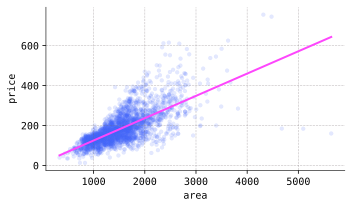

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib as mpl
import matplotlib_inline.backend_inline
import seaborn as sns
import scipy as sp
from itertools import product
import warnings
plt.style.use('../aux-files/custom_style_light.mplstyle')
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')
blue = '#486AFB'
magenta = '#FD46FC'

# linear regression example begins below

# import linear regression model from scikit-learn
from sklearn.linear_model import LinearRegression

# import data
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/data-3-1.csv'
df = pd.read_csv(url, usecols=['area', 'price'])

# pull out the 'area' column and 'price column from the data and convert them to numpy arrays
X = df['area'].to_numpy().reshape(-1, 1)
y = df['price'].to_numpy()

# instantiate a linear regression model
model = LinearRegression()

# train the model
model.fit(X=X, y=y)

# get the learned parameters
beta, beta_0 = model.coef_, model.intercept_

# build a grid for the regression line
grid = np.linspace(X.min(), X.max())

# plot the regression line
plt.plot(grid, beta * grid + beta_0, color=magenta)

# plot the data
plt.scatter(x=X, y=y, alpha=0.15)

plt.xlabel('area')
plt.ylabel('price')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

The positively-sloped line is used to visualize the approximate linear relationship {eq}`approx-linear-eqn`. This is a so-called _least squares line_ or _regression line_; we will learn how to compute them in {numref}`Chapter %s <learning>`.

But for now, let's define our first PGM:

````{prf:definition}
:label: linear-reg-def

A _linear regression model_ is a probabilistic graphical model whose underlying graph is of the form

```{image} ../img/lin-reg-00.svg
:width: 35%
:align: center
```
&nbsp;

where $\bX\in \bbr^n$. The model has the following parameters:

* A real parameter $\beta_0\in \mathbb{R}$.

* A parameter vector $\bbeta \in \mathbb{R}^n$.

* A positive real parameter $\sigma^2>0$.

The link function at $Y$ is given by

$$
Y \mid \bX \sim \mathcal{N}\big(\mu,\sigma^2\big), \quad \text{where} \quad \mu = \beta_0 + \bx^\intercal \bbeta.
$$
````

Before we introduce important terminology associated with linear regression models and look at an example, we need to discuss two important functions that will play a crucial role in the [next chapter](learning). The first is just the conditional density function of $Y$ given $\bX$, thought of as a function of the parameters:

```{prf:definition}
:label: linear-reg-pf-def

For fixed $\bx\in \bbr^n$ and $y\in \bbr$, the _model likelihood function_ for a linear regression model is the function

$$
\calL(\beta_0, \bbeta, \sigma^2; \ y\mid \bx) \def f\big(y \mid \bx ; \ \beta_0, \bbeta, \sigma^2\big) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[- \frac{1}{2\sigma^2} ( y - \mu)^2 \right]
$$ (model-likelihood-eq)

of the parameters $\beta_0,\bbeta, \sigma^2$, where $\mu = \beta_0 + \bx^\intercal \bbeta$.

```

```{margin}

Since this likelihood function is derived from a _conditional_ probability distribution, it is more accurately called a _conditional_ likelihood function.
```

You might naturally wonder why we are bothering with the new terminology _model likelihood function_ if---as shown in {eq}`model-likelihood-eq`---the only difference between the likelihood function and the conditional density function is the order in which we write the inputs to the functions. But the swap in order is intended to emphasize that the likelihood function is thought of as a function of the parameters, with $\bx$ and $y$ held fixed. To emphasize this point, we may occasionally write

$$
\calL_\text{model}(\beta_0,\bbeta, \sigma^2)
$$

for the model likelihood function, leaving $\bx$ and $y$ out of the notation altogether. The subscript is used to distinguish the _model_ likelihood function from the _data_ likelihood function, which we define next.

As the name indicates, this second likelihood function is associated not with just one $\bx$ and one $y$, but instead an entire observed dataset

$$
(\bx_1,y_1),(\bx_2,y_2),\ldots,(\bx_m,y_m) \in \bbr^{n} \times \bbr.
$$

We assume that the dataset is an observation of an IID random sample

$$
(\bX_1,Y_1),(\bX_2,Y_2),\ldots,(\bX_m, Y_m),
$$

which fits into a plated version of a linear regression model: 

```{image} ../img/lin-reg-00-plated.svg
:width: 35%
:align: center
```
&nbsp;

Then:

```{prf:definition}
:label: linear-reg-data-pf-def

Given an observed dataset

$$
(\bx_1,y_1),(\bx_2,y_2),\ldots,(\bx_m,y_m) \in \bbr^{n} \times \bbr,
$$

the _data likelihood function_ for a linear regression model is the function

$$
\calL(\beta_0,\bbeta,\sigma^2; y_1,\ldots,y_m \mid \bx_1,\ldots,\bx_m) \def f\big(y_1,\ldots,y_m \mid \bx_1,\ldots,\bx_m; \ \beta_0, \bbeta,\sigma^2 \big)
$$

of the parameters $\beta_0,\bbeta,\sigma^2$.
```

Again, superficially it appears that the only difference between the data likelihood function and the conditional density function is the order in which we write the inputs to the functions. But by writing the parameters first, we emphasize that the data likelihood is thought of as a function of the parameters, with the dataset held fixed. To further emphasize this, we shall sometimes write

$$
\calL_\text{data}(\beta_0,\bbeta, \sigma^2)
$$

for the data likelihood function when we need not explicitly mention the dataset.

Due to independence, it turns out that the data likelihood function factors into a product of model likelihood functions:

```{prf:theorem} Data likelihood functions of linear regression models
:label: linear-reg-data-pf-thm

Given an observed dataset

$$
(\bx_1,y_1),(\bx_2,y_2),\ldots,(\bx_m,y_m) \in \bbr^{n} \times \bbr,
$$

the data likelihood function for a linear regression model is given by

\begin{align*}
\calL_\text{data} (\beta_0,\bbeta,\sigma^2) &= \prod_{i=1}^m \calL(\beta_0,\bbeta,\sigma^2; \ y_i \mid \bx_i) \\
&= \frac{1}{(2\pi \sigma^2)^{m/2}} \exp \left[ -\frac{1}{2\sigma^2} \sum_{i=1}^m (y_i - \mu_i)^2 \right],
\end{align*}

where $\mu_i = \beta_0 + \bx_i^\intercal \bbeta$ for each $i=1,\ldots,m$.
```

```{prf:proof}

It will suffice to prove the equation

$$
f(y_1,\ldots,y_m \mid \bx_1,\ldots,\bx_m ) = \prod_{i=1}^m f(y_i \mid \bx_i),
$$

where, for ease of notation, we've omitted all parameters from the density functions. By independence of the random sample

$$
(\bX_1,Y_1),(\bX_2,Y_2),\ldots,(\bX_m,Y_m)
$$

and and the "vectorized" version of {prf:ref}`mass-density-ind-thm`, we have

$$
f(y_1,\ldots,y_m,\bx_1,\ldots,\bx_m) = f(y_1,\bx_1)f(y_2,\bx_2)\cdots f(y_m,\bx_m).
$$

But the sequence

$$
\bX_1,\bX_2,\ldots,\bX_m
$$

is independent as well (see {prf:ref}`ind-components-cor`), and so

$$
f(\bx_1,\ldots,\bx_m) = f(\bx_1)f(\bx_2)\cdots f(\bx_m).
$$

But then

\begin{align*}
f(y_1,\ldots,y_m \mid \bx_1,\ldots,\bx_m ) &= \frac{f(y_1,\ldots,y_m,\bx_1,\ldots,\bx_m)}{f(\bx_1,\ldots,\bx_m)} \\
&= \frac{f(y_1,\bx_1)\cdots f(y_m,\bx_m)}{f(\bx_1)\cdots f(\bx_m)} \\
&= \prod_{i=1}^m f(y_i \mid \bx_i),
\end{align*}

which is exactly what we wanted to prove. Q.E.D.
```

Notice that the proof of the equation

$$
f(y_1,\ldots,y_m \mid \bx_1,\ldots,\bx_m ) = \prod_{i=1}^m f(y_i \mid \bx_i)
$$

used nothing particular about linear regression models, and only relied upon independence of the random sample. This means that this same argument will apply to the data likelihood functions of the models that we will study in subsequent sections. (See {prf:ref}`log-reg-data-pf-thm` and {prf:ref}`neural-net-data-pf-thm`.)

Returning to our discussion of the linear regression model, the components of the vector $\bX$ are referred to as _predictors_, _regressors_, _explanatory variables_, or _independent variables_, while the random variable $Y$ is called the _response variable_ or the _dependent variable_. In the case that $n=1$, the model is called a _simple linear regression model_; otherwise, it is called a _multiple linear regression model_.

Note that

$$
E\big(Y \mid \bX = \bx \big) = \mu = \beta_0 + \bx^\intercal \bbeta,
$$

and so a linear regression model assumes (among other things) that the conditional mean of the response variable is linearly related to the regressors through the link function

$$
\mu = \beta_0 + \bx^\intercal \bbeta.
$$ (lin-reg-line-eqn)

The parameter $\beta_0$ is often called the _intercept_ or _bias term_, while the other $\beta_j$'s (for $j>0$) in the parameter vector

$$
\bbeta^\intercal = \begin{bmatrix} \beta_1 & \cdots & \beta_n \end{bmatrix}
$$

are called _weights_ or _slope coefficients_, since they are exactly the (infinitesimal) slopes:

$$
\frac{\partial \mu}{\partial x_j} = \beta_j
$$

where

$$
\bx^\intercal = \begin{bmatrix} x_1 & \cdots & x_n \end{bmatrix}.
$$

The random variable

$$
R \def Y - \beta_0 - \bX^\intercal \bbeta
$$

in a linear regression model is called the _residual_ or _error term_; note then that

$$
Y = \beta_0 + \bX^\intercal \bbeta + R \quad \text{and} \quad R \mid \bX \sim \mathcal{N}(0, \sigma^2).
$$ (random-lin-rel-eqn)

This is the manifestation in terms of random vectors and variables of the approximate linear relationship {eq}`approx-linear-eqn` described at the beginning of this section.

```{admonition} Problem Prompt

Do problems 3 and 4 on the worksheet.
```

Suppose we are given an observed dataset

$$
(\bx_1,y_1),(\bx_2,y_2),\ldots,(\bx_m,y_m) \in \bbr^{n} \times \bbr,
$$

corresponding to an IID sequence

$$
(\bX_1,Y_1),(\bX_2,Y_2),\ldots,(\bX_m,Y_m).
$$

This yields an associated sequence of residuals

$$
R_1,R_2,\ldots,R_m,
$$

where $R_i = Y_i - \beta_0 - \bX_i^\intercal \bbeta$ for each $i=1,\ldots,m$. By invariance of independence (see {prf:ref}`invar-independent-thm`), the residuals form an IID sequence of random variables.

For each $i=1,\ldots,m$, we define the _predicted values_

$$
\hat{y}_i = \beta_0 + \bx_i^\intercal \bbeta.
$$

Then we see that the difference

$$
r_i \def y_i - \hat{y}_i,
$$

also called a _residual_, is an observation of

$$
R_i \mid \bX_i \sim N(0,\sigma^2).
$$

Notice that the variance $\sigma^2$ does _not_ depend on the choice of data point $(\bx_i,y_i)$. This fixed-variance assumption built into linear regression models is sometimes called _homoscedasticity_.

In {numref}`Chapter %s <learning>`, we will learn how to train a linear regression model on a dataset to obtain optimal values of the parameters $\beta_0$ and $\bbeta$. Using these training methods, we obtained values for the parameters $\beta_0$ and $\bbeta = \beta_1$ for the Ames housing dataset mentioned at the beginning of this section. The positively-sloped line in the scatter plot at the beginning of this section was the line traced out by the link function $\mu = \beta_0 + x\beta_1 $. The predicted values $\hat{y}_i$ lie along this line, and the magnitude of the residual $r_i$ may be visualized as the vertical distance from the true data point $y_i$ to this line. We may plot the residuals $r_i$ against the predictor variables $x_i$ to get:

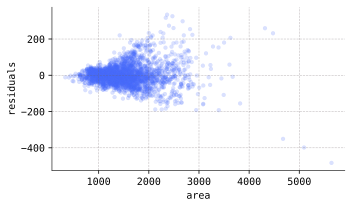

In [2]:
# get the predictions
y_hat = model.predict(X=X)

# get the residuals
resid = y - y_hat

# plot the residuals vs. area
plt.scatter(x=X, y=resid, alpha=0.20)

plt.xlabel('area')
plt.ylabel('residuals')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

It is evident from this plot that the homoscedasticity assumption is violated since the distributions of the residuals appear to widen as the area variable increases.

As with the parameters $\beta_0$ and $\bbeta$, it is also possible to learn an optimal value of the variance $\sigma^2$. As another method of model checking, given all the learned parameters $\beta_0$, $\beta_1$, and $\sigma^2$ for the Ames dataset, we may generate a new dataset by sampling from the normal distributions $\mathcal{N}\big(\hat{y}_i, \sigma^2\big)$ for each $i=1,\ldots,m$. A scatter plot of one simulated dataset is on the left in the following figure, while a KDE of the simulated dataset is compared against the "true" KDE on the right:

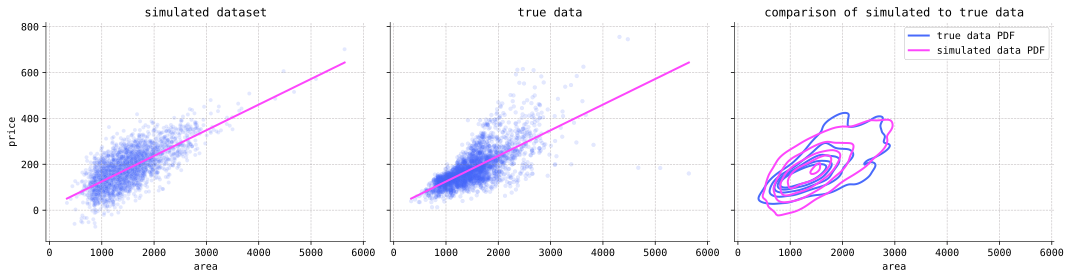

In [3]:
# import statsmodels
import statsmodels.formula.api as smf

# instantiate and train a linear regression model from statsmodels
model = smf.ols(formula='price ~ area', data=df).fit()

# get the learned standard deviation
sigma = np.sqrt(model.scale)

# generate the dataset
np.random.seed(42)
y_gen = sp.stats.norm(loc=y_hat, scale=sigma).rvs(2930)
df_gen = pd.DataFrame({'area': df['area'], 'price': y_gen})

df['indicator'] = 'true data PDF'
df_gen['indicator'] = 'simulated data PDF'
df_combined = pd.concat(objs=[df, df_gen], axis=0)

# setup the figure
_, axes = plt.subplots(ncols=3, figsize=(15, 4), sharex=True, sharey=True)

# plot the dataset
sns.scatterplot(data=df_gen, x='area', y='price', alpha=0.15, ax=axes[0])

# plot the original regression line
axes[0].plot(grid, beta_0 + beta * grid, color=magenta)
axes[0].set_title('simulated dataset')

# plot the true data
axes[1].plot(grid, beta * grid + beta_0, color=magenta)
axes[1].scatter(x=X, y=y, alpha=0.15)
axes[1].set_title('true data')

# plot the KDEs
g = sns.kdeplot(data=df_combined, x='area', y='price', hue='indicator', levels=6, ax=axes[2])
g.get_legend().set_title(None)
axes[2].set_title('comparison of simulated to true data')

plt.tight_layout()

For smaller values of area, the distribution of the true prices is narrower compared to the simulated prices, while for larger values of area, the distribution of the true prices is wider.





















(log-reg-sec)=
## Logistic regression models

The types of models studied in this section are closely related to the linear regression models in the previous, but here the goal is to model a dataset of the form

$$
(\bx_1,y_1),(\bx_2,y_2),\ldots,(\bx_m,y_m) \in \bbr^{n} \times \{0,1\}.
$$

Such datasets arise naturally in _binary classification problems_, where we aim to determine which of two classes a given object lies in based on predictor features. The true class of the $i$-th object is indicated by the value of $y_i$, while the vector $\bx_i$ consists of the predictor features.

As a running example through this section, consider the data given in the following scatter plot:

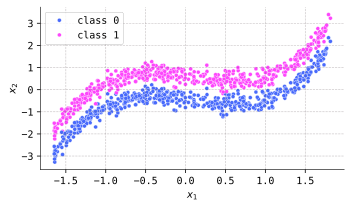

In [4]:
# import scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# import the data
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/ch10-book-data-01.csv'
df = pd.read_csv(url)

# convert the data to numpy arrays
X = df[['x_1', 'x_2']].to_numpy()
y = df['y'].to_numpy()

# scale the input data
ss = StandardScaler()
X = ss.fit_transform(X=X)

# replaced the columns of the dataframe with the transformed data
df['x_1'] = X[:, 0]
df['x_2'] = X[:, 1]

# plot the data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

The points represent the $2$-dimensional predictors

$$
\bx_i^\intercal = \begin{bmatrix} x_{i1} & x_{i2} \end{bmatrix},
$$

while the color indicates the class $y_i \in \{0,1\}$. Our goal in this section is to capture the evident pattern in the data using a _logistic regression model_.

To define these models, we first need to discuss the important _sigmoid function_, defined as

$$
\sigma: \bbr \to (0,1), \quad \sigma(x) = \frac{1}{1+e^{-x}}.
$$

Its graph is:

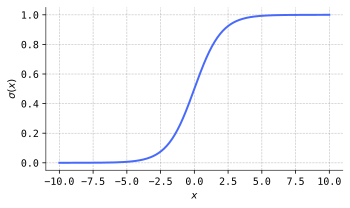

In [5]:
import torch
import torch.nn.functional as F

grid = torch.linspace(start=-10, end=10, steps=300)
plt.plot(grid, F.sigmoid(grid))
plt.gcf().set_size_inches(w=5, h=3)
plt.xlabel('$x$')
plt.ylabel('$\sigma(x)$')
plt.tight_layout()

Since the outputs of the sigmoid function land in the open interval $(0,1)$, we may use it to convert _any_ real number into a _probability_. 

```{admonition} Problem Prompt

Do problem 5 on the worksheet.
```

Using the sigmoid function, we define the models studied in this section:

````{prf:definition}
:label: log-reg-def

A _logistic regression model_ is a probabilistic graphical model whose underlying graph is of the form

```{image} ../img/log-reg-00.svg
:width: 35%
:align: center
```
&nbsp;

where $\bX\in \bbr^{n}$. The model has the following parameters:

* A real parameter $\beta_0\in \mathbb{R}$.

* A parameter vector $\bbeta \in \mathbb{R}^{n}$.

The link function at $Y$ is given by

$$
Y \mid \bX \sim \mathcal{B}er(\phi), \quad \text{where} \quad \phi = \sigma(\beta_0 + \bx^\intercal\bbeta),
$$

and where $\sigma$ is the sigmoid function.
````

Notice that the link function $\phi = \sigma(\beta_0 + \bx^\intercal\bbeta )$ in a logistic regression model is precisely the affine link function $\mu = \beta_0 + \bx^\intercal \bbeta$ of a linear regression model composed with the sigmoid function.

Following the pattern begun in the previous section, we now describe the two likelihood functions of logistic regression models that will be used in the [next chapter](learning) to train these models:


```{prf:definition}
:label: log-reg-pf-def

For fixed $\bx \in \bbr^n$ and $y\in \{0,1\}$, the _model likelihood function_ for a logistic regression model is the function

$$
\calL(\beta_0, \bbeta; \ y\mid \bx) \def p\big(y \mid \bx ; \ \beta_0, \bbeta\big) = \phi^y (1-\phi)^{1-y}
$$

of the parameters $\beta_0,\bbeta$, where $\phi = \sigma(\beta_0 + \bx^\intercal \bbeta )$.
```

As for the linear regression models in the previous section, the difference between the likelihood function and the conditional mass function is that the former is thought of as a function of the parameters.

The second likelihood function is obtained from an observation of an IID random sample

$$
(\bX_1,Y_1),(\bX_2,Y_2),\ldots,(\bX_m,Y_m)
$$

corresponding to a plated version of a logistic regression model

```{image} ../img/log-reg-00-plated.svg
:width: 35%
:align: center
```
&nbsp;

We then have:

```{prf:definition}
:label: log-reg-data-pf-def

Given an observed dataset

$$
(\bx_1,y_1),(\bx_2,y_2),\ldots,(\bx_m,y_m) \in \bbr^{n} \times \{0,1\},
$$

the _data likelihood function_ for a logistic regression model is the function

$$
\calL(\beta_0,\bbeta; \ y_1,\ldots,y_m \mid \bx_1,\ldots,\bx_m) \def p\big(y_1,\ldots,y_m \mid \bx_1,\ldots,\bx_m; \ \beta_0, \bbeta\big)
$$

of the parameters $\beta_0,\bbeta$.
```

When explicitly mentioning the observed dataset is not important, we may write

$$
\calL_\text{model}(\beta_0,\bbeta) \quad \text{and} \quad \calL_\text{data}(\beta_0,\bbeta)
$$

for the model and data likelihood functions of a logistic regression model.

Using independence of the observed dataset, one easily proves the following result using the same argument as the one given in {prf:ref}`linear-reg-data-pf-thm`:

```{prf:theorem} Data likelihood functions of logistic regression models
:label: log-reg-data-pf-thm

Given an observed dataset

$$
(\bx_1,y_1),(\bx_2,y_2),\ldots,(\bx_m,y_m) \in \bbr^{n} \times \{0,1\},
$$

the data likelihood function for a logistic regression model is given by

$$
\calL_\text{data} (\beta_0,\bbeta) = \prod_{i=1}^m \calL(\beta_0,\bbeta; \ y_i \mid \bx_i) = \prod_{i=1}^m \phi_i^{y_i} (1-\phi_i)^{1-y_i},
$$

where $\phi_i = \sigma(\beta_0 + \bx_i^\intercal \bbeta)$ for each $i=1,\ldots,m$.
```

Let's return to our toy dataset introduced at the beginning of the section. In the [next chapter](learning) we will see how to learn optimal values of the parameters $\beta_0$ and $\bbeta$ from the data. With these parameters in hand, one way to check how well a logistic regression model captures the data is to draw a contour plot of the function $\phi = \sigma( \beta_0 + \bx^\intercal \bbeta )$. This contour plot appears on the left in the following:

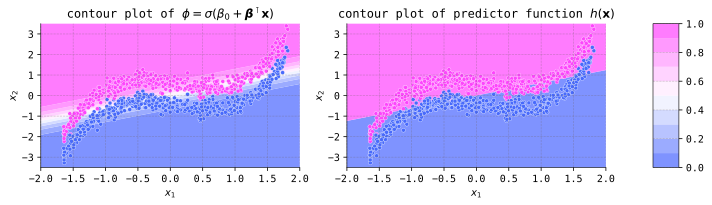

In [6]:
# import logistic regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# instantiate a logistic regression model
model = LogisticRegression()

# train the model
model.fit(X=X, y=y)

# get the grid for the contour plot
resolution = 1000
x_1 = (-2, 2)
x_2 = (-3.5, 3.5)
x1_grid, x2_grid = torch.meshgrid(torch.linspace(*x_1, resolution), torch.linspace(*x_2, resolution))
grid = torch.column_stack((x1_grid.reshape((resolution ** 2, -1)), x2_grid.reshape((resolution ** 2, -1))))

# define colormaps for the contour plots
desat_blue = '#7F93FF'
desat_magenta = '#FF7CFE'
diverging_cmap = clr.LinearSegmentedColormap.from_list(name='diverging', colors=[desat_blue, 'white', desat_magenta], N=10)
binary_cmap = clr.LinearSegmentedColormap.from_list(name='binary', colors=[desat_blue, desat_magenta], N=2)

_, axes = plt.subplots(ncols=3, figsize=(10, 3), width_ratios=[10, 10, 1])

# generate the contour plots
z = model.predict_proba(grid)[:, 1]
z = z.reshape(resolution, resolution)
axes[0].contourf(x1_grid, x2_grid, z, cmap=diverging_cmap, levels=diverging_cmap.N)
z = model.predict(grid)
z = z.reshape(resolution, resolution)
axes[1].contourf(x1_grid, x2_grid, z, cmap=binary_cmap, levels=binary_cmap.N)

# create the colorbar
plt.colorbar(mpl.cm.ScalarMappable(cmap=diverging_cmap), cax=axes[2], orientation='vertical')

# plot the data
for axis in axes[:-1]:
    sns.scatterplot(data=df, x='x_1', y='x_2', hue='y', ax=axis, legend=False)
    axis.set_xlabel('$x_1$')
    axis.set_ylabel('$x_2$')

axes[0].set_title('contour plot of $\\phi = \\sigma(\\beta_0 + \\boldsymbol{\\beta}^\\intercal \\mathbf{x})$')
axes[1].set_title('contour plot of predictor function $h(\mathbf{x})$')
plt.tight_layout()

To interpret this plot, remember that $\phi = \sigma( \beta_0 + \bx^\intercal \bbeta )$ is the probability parameter for the class indicator variable $Y \sim \Ber(\phi)$, so we should interpret $\phi$ as the probability that the point $\bx$ is in class $1$ (corresponding to $y=1$). In the right-hand plot, we have "thresholded" the probability $\phi$ at $0.5$, creating a _predictor function_

$$
h:\bbr^{2} \to \{0,1\}, \quad h(\bx) = \begin{cases}
0 & : \sigma(\beta_0 + \bx^\intercal \bbeta ) < 0.5, \\
1 & : \sigma(\beta_0 + \bx^\intercal \bbeta ) \geq 0.5. \\
\end{cases}
$$

The _decision boundary_ is exactly the curve in $\bbr^2$ consisting of those $\bx$ for which the predictor $h$ is "flipping a coin," i.e., it consists of those points $\bx$ such that

$$
\sigma(\beta_0 + \bx^\intercal \bbeta ) = 0.5,
$$

which is equivalent to

$$
\beta_0 + \bx^\intercal \bbeta = 0.
$$

Notice that this defines a _linear_ decision boundary that separates $\bbr^2$ into two unbounded half planes based on whether

$$
\beta_0 + \bx^\intercal\bbeta > 0 \quad \text{or} \quad \beta_0 + \bx^\intercal \bbeta < 0.
$$

Those vectors $\bx$ satisfying the first inequality would be predicted to belong to class $1$, while those satisfying the latter inequality would be predicted to belong to class $0$. As is evident from the plots, our logistic regression model is doing its best to accurately classify as many data points as possible, but it is handicapped by the fact it will _always_ produce a linear decision boundary.

```{admonition} Problem Prompt

Do problem 6 on the worksheet.
```
















(nn-sec)=
## Neural network models

The desire to obtain _nonlinear_ decision boundaries is (in part) the motivation for the probabilistic graphical models studied in this section, called _neural networks_. While there are many (_many!_) different types of neural network architectures in current use, the particular type that we shall begin our study with are _fully-connected, feedforward neural networks with one hidden layer_.

Essentially, these types of neural networks are logistic regression models with a hidden deterministic node $\bz$ sandwiched between the predictor features $\bX$ and the response variable $Y$. The link from $\bz$ to $Y$ goes through the same sigmoid function used in the definition of logistic regression models, but the link from $\bX$ to $\bz$ goes through a function called the _rectified linear unit_ (_ReLU_), defined as

$$
\rho: \bbr \to [0,\infty), \quad \rho(x) = \max\{0, x\}.
$$

The ReLU function is piecewise linear, with a graph of the form:

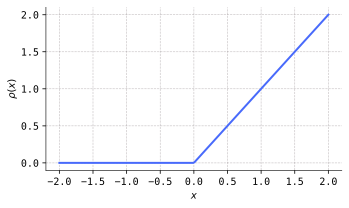

In [7]:
relu_grid = torch.linspace(start=-2, end=2, steps=200)
plt.plot(relu_grid, F.relu(relu_grid))
plt.gcf().set_size_inches(w=5, h=3)
plt.xlabel('$x$')
plt.ylabel('$\\rho(x)$')
plt.tight_layout()

We may apply the ReLU function to vectors $\bx\in \bbr^{n}$ by "vectorization" (in Pythonic language), which just means that we apply it componentwise:

$$
\rho(\bx)^\intercal \def \begin{bmatrix} \rho(x_1) & \cdots & \rho(x_n) \end{bmatrix}.
$$

Using these pieces, we now state the official definition in the case that the neural network has one hidden layer; later, we shall indicate how one obtains "deeper" neural networks by adding additional hidden layers.


````{prf:definition}
:label: neural-net-def

A _(fully-connected, feedforward) neural network with one hidden layer_ is a probabilistic graphical model whose underlying graph is of the form

```{image} ../img/nn-00.svg
:width: 40%
:align: center
```
&nbsp;

where $\bX\in \bbr^n$ and $\ba \in \bbr^p$. The model has the following parameters:

* A parameter matrix $\bW_1 \in \mathbb{R}^{n\times p}$.

* A parameter vector $\bb_1 \in \mathbb{R}^{p}$.

* A parameter vector $\bw_2 \in \mathbb{R}^{p}$.

* A real parameter $b_2 \in \mathbb{R}$.

The link function at $\mathbf{a}$ is given by

$$
\ba^\intercal = \rho(\bx^\intercal \bW_1 + \bb_1^\intercal),
$$

while the link function at $Y$ is given by

$$
Y \mid \bX  \sim \mathcal{B}er(\phi), \quad \text{where} \quad \phi = \sigma(\ba^\intercal \bw_2 + b_2).
$$ (link-nn-eq)

Here, $\rho$ is the ReLU function and $\sigma$ is the sigmoid function.
````

As the proliferation of transposes indicates, the formulas for the link functions given here express a preference for row vectors rather than column vectors. This is, in part, because some of us are psychologically conditioned (including the author) to think of a feature vector of a single example as a _row_ vector rather than a column vector, much as we see in data frames in Python. But by applying the transpose operation to each side of the equations defining the link functions, we obtain formulas that are more in line with what the reader might see in other references:

$$
\ba = \rho( \bW_1^\intercal \bx + \bb_1) \quad \text{and} \quad \phi = \sigma(\bw_2^\intercal \ba  + b_2)
$$

The name "neural network" comes from a loose analogy with networks of biological neurons in the human brain. For this reason, sometimes neural network models are called _artificial neural networks_ (*ANN*s). The parameters $\bW_1$ and $\bw_2$ are called _weights_, while the parameters $\bb_1$ and $b_2$ are called _biases_. The ReLU function $\rho$ and the sigmoid function $\sigma$ are often called the _activation functions_ of the network.

Note that the form of the link function $\phi=\phi(\ba, \bw_2,b_2)$ described in {eq}`link-nn-eq` does not explicitly display the dependence of the conditional distribution $Y \mid \bX \sim \Ber(\phi)$ on observed values $\bX = \bx$. For that, one needs to compose the two link functions at $\ba$ and $Y$ to get

$$
\phi = \sigma(\ba^\intercal \bw_2 + b_2) = \sigma\left[ \rho(\bx^\intercal \bW_1 + \bb_1^\intercal) \bw_2 + b_2\right].
$$ (big-link-eq)

Expressed in this manner, with the hidden deterministic vector $\ba$ removed, we may think of a neural network model as a PGM with underlying graph

```{image} ../img/nn-03.svg
:width: 40%
:align: center
```
&nbsp;

and link function $Y$ given by {eq}`big-link-eq`.

We now turn toward the likelihood functions:

```{prf:definition}
:label: neural-net-pf-def

For fixed $\bx\in \bbr^n$ and $y\in \{0,1\}$, the _model likelihood function_ for a neural network model is the function

$$
\calL(\bW_1, \bb_1, \bw_2, b_2 ; \ y\mid \bx) \def p\big(y \mid \bx ; \ \bW_1, \bb_1, \bw_2, b_2 \big) = \phi^y (1-\phi)^{1-y}
$$

of the parameters $\bW_1, \bb_1, \bw_2, b_2$, where

\begin{align*}
\ba^\intercal &= \rho(\bx^\intercal \bW_1 + \bb_1^\intercal), \\ 
\phi &= \sigma(\ba^\intercal \bw_2 + b_2).
\end{align*}
```

As with linear and logistic regression models, the second likelihood function is obtained from an IID random sample

$$
(\bX_1,Y_1),(\bX_2,Y_2),\ldots,(\bX_m,Y_m)
$$

corresponding to a plated version of a neural network model:

```{image} ../img/nn-00-plated.svg
:width: 40%
:align: center
```
&nbsp;

We then have:

```{prf:definition}
:label: neural-net-data-pf-def

Given an observed dataset

$$
(\bx_1,y_1),(\bx_2,y_2),\ldots,(\bx_m,y_m) \in \bbr^{n} \times \{0,1\},
$$

the _data likelihood function_ for a neural network model is the function

$$
\calL(\bW_1, \bb_1, \bw_2, b_2 ; \ y_1,\ldots,y_m \mid \bx_1,\ldots,\bx_m) \def p\big(y_1,\ldots,y_m \mid \bx_1,\ldots,\bx_m; \ \bW_1, \bb_1, \bw_2, b_2\big)
$$

of the parameters $\bW_1, \bb_1, \bw_2, b_2$.
```

We will write

$$
\calL_\text{model}(\bW_1, \bb_1, \bw_2, b_2) \quad \text{and} \quad \calL_\text{data}(\bW_1, \bb_1, \bw_2, b_2)
$$

when explicitly mentioning the observed dataset is not important. We then prove using the same argument given for {prf:ref}`linear-reg-data-pf-thm`:

```{prf:theorem} Data likelihood functions of neural network models
:label: neural-net-data-pf-thm

Given an observed dataset

$$
(\bx_1,y_1),(\bx_2,y_2),\ldots,(\bx_m,y_m) \in \bbr^{n} \times \{0,1\},
$$

the data likelihood function for a neural network model is given by

$$
\calL_\text{data}(\bW_1, \bb_1, \bw_2, b_2) = \prod_{i=1}^m \calL(\bW_1, \bb_1, \bw_2, b_2; \ y_i \mid \bx_i) = \prod_{i=1}^m \phi_i^{y_i} (1-\phi_i)^{1-y_i}
$$

where

\begin{align*}
\ba_i^\intercal &= \rho(\bx_i ^\intercal \bW_1 + \bb_1^\intercal), \\ 
\phi_i &= \sigma(\ba_i^\intercal \bw_2 + b_2),
\end{align*}

for each $i=1,\ldots,m$.
```

Very often, one sees the underlying graph of a neural network displayed in terms of the components of the vectors (with the parameters omitted). For example, in the case that $\bX$ is $3$-dimensional and $\ba$ is $4$-dimensional, we might see the graph of the neural network drawn as

```{image} ../img/nn-neuron.svg
:width: 50%
:align: center
```
&nbsp;

In this format, the nodes are often called _(artificial) neurons_ or _units_. The visible neurons $X_1,X_2,X_3$ are said to comprise the _input layer_ of the network, the hidden neurons $a_1,a_2,a_3,a_4$ make up a _hidden layer_, and the single visible neuron $Y$ makes up the _output layer_. The network is called _fully-connected_ because there is a link function at a given neuron _from_ every neuron in the previous layer and _to_ every neuron in the subsequent layer; it is called a _feedfoward_ network because the link functions only go in one direction, with no feedback loops. The link function at $a_j$ is of the form

$$
a_j = \rho(\bx^\intercal \bw_{1j} + b_{1j}),
$$

where

$$
\bW_1 = \begin{bmatrix} \uparrow & \uparrow & \uparrow & \uparrow \\ \bw_{11} & \bw_{12} & \bw_{13} & \bw_{14} \\
\downarrow & \downarrow & \downarrow & \downarrow \end{bmatrix} \quad \text{and} \quad \bb^\intercal_1 = \begin{bmatrix} b_{11} & b_{12} & b_{13} & b_{14} \end{bmatrix}.
$$

Thus, each hidden neuron processes information by first computing an affine combination of the input features $\bx$ (i.e., a weighted sum plus a bias term), and then applies the activation function $\rho$ to the result.

From our networks with just one hidden layer, it is easy to imagine how we might obtain "deeper" networks by adding additional hidden layers; for example, a network with two hidden layers might look like this:

```{image} ../img/nn-neuron-02.svg
:width: 70%
:align: center
```
&nbsp;

where

$$
\ba_1^\intercal = \begin{bmatrix} a_{11} & a_{12} & a_{13} & a_{14} \end{bmatrix} \quad \text{and} \quad
\ba_2^\intercal = \begin{bmatrix} a_{21} & a_{22} \end{bmatrix}.
$$

If we collapse the neurons into vectors and bring in the parameters, this network would be drawn as

```{image} ../img/nn-02.svg
:width: 55%
:align: center
```
&nbsp;

The link functions at $\ba_1$ and $\ba_2$ are given by

$$
\ba_1^\intercal = \rho\big(\bx^\intercal \bW_1 + \bb_1^\intercal \big) \quad \text{and} \quad \ba_2^\intercal = \rho(\ba_1^\intercal \bW_2 + \bb_2^\intercal),
$$

while the link function at $Y$ is the same as it was before:

$$
Y \mid \bX \sim \Ber(\phi), \quad \text{where} \quad \phi = \sigma \big( \ba_2^\intercal \bw_3 + b_3\big).
$$

Going beyond two hidden layers, we define the _depth_ $d$ of a neural network to be one less than the total number of layers, or equivalently, the number of (trainable) parameter groups

$$
(\bW_1,\bb_1),(\bW_2,\bb_2),\ldots,(\bw_d,b_d).
$$

The _widths_ of a network are the dimensions of the input and output vectors of the network, as well as the dimensions of the hidden vectors.

Let's return to our toy dataset from the [previous section](log-reg-sec), but for extra fun let's add four "blobs" of data:

In [8]:
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/ch10-book-data-03.csv'
df = pd.read_csv(url)

# convert the data to numpy arrays
X = df[['x_1', 'x_2']].to_numpy()
y = df['y'].to_numpy()

# scale the input data
ss = StandardScaler()
X = ss.fit_transform(X=X)

# replaced the columns of the dataframe with the transformed data
df['x_1'] = X[:, 0]
df['x_2'] = X[:, 1]

# convert the data to torch tensors
X = torch.tensor(data=X, dtype=torch.float32)
y = torch.tensor(data=y, dtype=torch.float32)

# plot the data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, k2 in zip(g.legend_.texts, new_labels):
    t.set_text(k2)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

KeyboardInterrupt: 

Trained on the original dataset (without the "blobs"), we saw that a logistic regression model produces a _linear_ decision boundary and thus misclassifies a nontrivial number of data points. In comparison, not only will a neural network produce a nonlinear decision boundary dividing the data in the original dataset, it will also correctly classify the data in the four new "blobs." Indeed, using the techniques in the [next chapter](learning), we trained a neural network on the new dataset with _three_ hidden layers of widths $8$, $8$, and $4$. Then, a contour plot of the function

$$
\phi = \sigma\big(\ba_3^\intercal\bw_4 + b_4\big)
$$

appears on the left-hand side of the following figure, while the "thresholded" version (at $0.5$) appears on the right-hand side displaying the (nonlinear!) decision boundaries:

In [ ]:
import torch.nn as nn

# define the neural network model architecture
torch.manual_seed(84)
p1 = 8 # width of first hidden layer
p2 = 8 # width of second hidden layer
p3 = 4 # width of third hidden layer

class NeuralNetwork(nn.Module):
    def __init__(self, input_dimension):
        super().__init__()

        # three hidden layers...
        self.z1 = nn.Linear(in_features=input_dimension, out_features=p1)
        self.a1 = nn.ReLU()
        self.z2 = nn.Linear(in_features=p1, out_features=p2)
        self.a2 = nn.ReLU()
        self.z3 = nn.Linear(in_features=p2, out_features=p3)
        self.a3 = nn.ReLU()
        
        # ...and one output layer
        self.z4 = nn.Linear(in_features=p3, out_features=1)
        self.phi = nn.Sigmoid()

    def forward(self, X):
        a1 = self.a1(self.z1(X))
        a2 = self.a2(self.z2(a1))
        a3 = self.a3(self.z3(a2))
        phi = self.phi(self.z4(a3))

        return phi, a1, a2, a3
    
model = NeuralNetwork(input_dimension=2)

# define the loss function and optimizer
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=5e-1)

# train the model
num_epochs = 4000
for _ in range(num_epochs):
    y_hat = model(X)[0]
    loss = loss_fn(y_hat.squeeze(), y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

_, axes = plt.subplots(ncols=3, figsize=(10, 4), width_ratios=[10, 10, 1])

# get the grid for the contour plot
resolution = 1000
x1_grid = torch.linspace(-1.75, 1.75, resolution)
x2_grid = torch.linspace(-1.5, 1.5, resolution)
x1_grid, x2_grid = torch.meshgrid(x1_grid, x2_grid)
grid = torch.column_stack((x1_grid.reshape((resolution ** 2, -1)), x2_grid.reshape((resolution ** 2, -1))))

# generate the contour plots
grid_outputs = model(grid)
z = grid_outputs[0].detach()
z = z.reshape(resolution, resolution)
axes[0].contourf(x1_grid, x2_grid, z, cmap=diverging_cmap, levels=diverging_cmap.N)
z = grid_outputs[0] >= 0.5
z = z.reshape(resolution, resolution)
axes[1].contourf(x1_grid, x2_grid, z, cmap=binary_cmap, levels=binary_cmap.N)

# create the colorbar
plt.colorbar(mpl.cm.ScalarMappable(cmap=diverging_cmap), cax=axes[2], orientation='vertical')

# plot the data
for axis in axes[:-1]:
    sns.scatterplot(data=df, x='x_1', y='x_2', hue='y', ax=axis, legend=False)
    axis.set_xlabel('$x_1$')
    axis.set_ylabel('$x_2$')

axes[0].set_title('contour plot of $\\phi = \\sigma(\\mathbf{a}_3^\\intercal \\boldsymbol{w}_4 + b_4)$')
axes[1].set_title('contour plot of predictor function $h(\mathbf{x})$')
plt.tight_layout()

Notice that the band of white dividing the original dataset (representing values $\phi \approx 0.5$) in the left-hand plot is much narrower compared to the same plot for the logistic regression model. This indicates that the neural network is making much more confident predictions up to its decision boundary (displayed in the right-hand plot) compared to the logistic regression model.

One of the major differences between neural networks and models like linear and logistic regression is that all variables in the latter types are visible, while neural networks contain layers of hidden variables sandwiched between the visible ones. This presents the analyst with a problem of understanding and interpretability: What exactly are the hidden neurons _doing_ in a neural network model, and how might we interpret their output in human-understandable ways?

Answers to these questions that are simultaneously broad enough to cover many use cases, while narrow enough to actually say something specific and meaningful, are very difficult to come by---indeed, this is an active area of research in machine learning. But generally speaking, it is often useful to think of the hierarchy of layers in a neural network---beginning from the input layer, progressing through the hidden layers to the output layer---as a _hierarchy of representations_ progressing from the broad and general to the specific and refined. Here, by a _representation_, we mean an encoding of some real-world object or concept as a finite-dimensional vector of numerical features. For an example, consider a cat sitting on a chair---how might we represent this scene as a vector of numerical features understandable by a computer? One way is to take a picture of the cat with a digital camera, which encodes the scene into a digital picture consisting of an $m\times n$ rectangular grid of pixels. The color of each pixel is uniquely identified by an _RGB triplet_ $(r,g,b)$, where the components are numbers that specify how much red, green, and blue are needed to form the color. Thus, the cat may be encoded into a feature vector which is actually a $3$-dimensional tensor of size $m\times n \times 3$. This is a _representation_ of the scene.

&nbsp;
```{image} ../img/cat.svg
:width: 80%
:align: center
```
&nbsp;

For another example, consider our familiar Ames housing dataset. The numerical features in this dataset comprise a _representation_ of the housing market in Ames, Iowa. The dataset is not _literally_ the housing market, just as the digital picture that I see on my screen of my cat sitting on a chair is not _literally_ my cat! So, it is important to understand that the datasets we deal with in the real world are _all_ representations, in this sense. And which numerical features to include in a given dataset is often decided by a human based on many factors---the features are identified and extracted from the real world by hand, as they say. As such, these features are often understandable and interpretable by a human since they clearly map onto real-world, tangible things.

Now, suppose that $\bx$ is an input feature vector to a neural network. On its way through the network, it begins by landing in the first hidden layer, transforming into the vector

$$
\ba_1^\intercal = \rho(\bx^\intercal \bW_1 + \bb_1^\intercal).
$$

We think of $\ba_1$ as _another_ representation of the data, but the meaning of its components---the "activations of the neurons"---are difficult to interpret because the weight matrix $\bW_1$ and bias vector $\bb_1$ are learned through the (usually very opaque) training process (see {numref}`Chapter %s <learning>`). Then, _this_ new feature vector $\ba_1$ is passed into the second layer, creating _yet another_ new representation

$$
\ba_2^\intercal = \rho(\ba_1^\intercal \bW_2 + \bb_2^\intercal)
$$

of the data. For a network of depth $d$, this process of iteratively creating new representations of the data based on the previous ones continues all the way to the vector $\ba_{d-1}$ in the last hidden layer, which is then used to create the probability

$$
\phi = \sigma( \ba_{d-1}^\intercal \bw_d + b_d)
$$

that parametrizes the distribution of the random variable $Y\sim \Ber(\phi)$ in the output layer. So, the end result of the "forward pass" through the network is a sequence of representations

$$
\bx,\ba_1,\ba_2,\ldots,\ba_{d-1}
$$ (forward-pass-eq)

of the data, beginning with the (often human constructed) feature vector $\bx$. As we mentioned above, one can often think of this sequence of representations as a progression from the broad and general, to the specific and refined. For example, the following contour plots show the activations of the eight neurons in the first hidden layer of our network trained to classify the data in our toy example:

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(14, 5))
subfigs = fig.subfigures(ncols=2, nrows=1, width_ratios=[18, 1])

light_cmap = clr.LinearSegmentedColormap.from_list(name='light', colors=['white', magenta], N=16)

# hidden layer 1, with 8 neurons
subfig = subfigs[0]
subfig.suptitle(f'neurons in hidden layer 1')
axes = subfig.subplots(nrows=2, ncols=4, sharex=True, sharey=True)
    
for j, axis in enumerate(axes.flatten()):
    z = grid_outputs[1][:, j].detach().numpy()
    z = z.reshape(resolution, resolution)
    contour = axis.contourf(x1_grid, x2_grid, z, cmap=light_cmap, levels=light_cmap.N, vmin=0, vmax=3)
    
    sns.scatterplot(data=df, x='x_1', y='x_2', hue='y', ax=axis, legend=False, zorder=3)
    axis.set_title(f'neuron {j + 1}')
    axis.set_xlabel('$x_1$')
    axis.set_ylabel('$x_2$')

# plot the colorbar
subfig = subfigs[1]
axis = subfig.subplots()
cbar = subfig.colorbar(mpl.cm.ScalarMappable(cmap=light_cmap), cax=axis, orientation='vertical')
cbar.set_ticklabels([round(3 / 5 * k, 1) for k in range(5)] + ['>5.0'])

Specifically, these plots show the contours of the functions

$$
a_{1j} = \rho( \bx^\intercal \bw_{1j} + \bb_{1j}^\intercal ),
$$

for each $j=1,\ldots,8$, where

$$
\ba_1^\intercal = \begin{bmatrix} a_{11} & \cdots & a_{18} \end{bmatrix}, \quad
\bW_1 = \begin{bmatrix} \uparrow & \cdots & \uparrow \\
\bw_{11} & \cdots & \bw_{18} \\
\downarrow & \cdots & \downarrow
\end{bmatrix}, \quad
\bb_1^\intercal = \begin{bmatrix} b_{11} & \cdots & b_{18} \end{bmatrix}.
$$

We see from the plots that the neurons are active on half planes of parameter space---their activations are not highlighting specific, refined structures in the data, but rather broad structures. The components in the representation $\ba_1$ indicate what combination of these half planes the given data point lies in; a larger number for a component indicates that the point is further away from the boundary of the half planes. This new representation $\ba_1$ is then passed into the second hidden layer, revealing these activations:

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(14, 5))
subfigs = fig.subfigures(ncols=2, nrows=1, width_ratios=[18, 1])

light_cmap = clr.LinearSegmentedColormap.from_list(name='light', colors=['white', magenta], N=16)

# hidden layer 2, with 8 neurons
subfig = subfigs[0]
subfig.suptitle(f'neurons in hidden layer 2')
axes = subfig.subplots(nrows=2, ncols=4, sharex=True, sharey=True)
    
for j, axis in enumerate(axes.flatten()):
    z = grid_outputs[2][:, j].detach().numpy()
    z = z.reshape(resolution, resolution)
    contour = axis.contourf(x1_grid, x2_grid, z, cmap=light_cmap, levels=light_cmap.N, vmin=0, vmax=3)
    
    sns.scatterplot(data=df, x='x_1', y='x_2', hue='y', ax=axis, legend=False, zorder=3)
    axis.set_title(f'neuron {j + 1}')
    axis.set_xlabel('$x_1$')
    axis.set_ylabel('$x_2$')

# plot the colorbar
subfig = subfigs[1]
axis = subfig.subplots()
cbar = subfig.colorbar(mpl.cm.ScalarMappable(cmap=light_cmap), cax=axis, orientation='vertical')
cbar.set_ticklabels([round(3 / 5 * k, 1) for k in range(5)] + ['>5.0'])

These are contour plots of the functions

$$
\ba_{2j} = \rho(\ba_1^\intercal \bw_{2j} + \bb_{2j})
$$

for each $j=1,\ldots,8$, where

$$
\ba_2^\intercal = \begin{bmatrix} a_{21} & \cdots & a_{28} \end{bmatrix}, \quad
\bW_2 = \begin{bmatrix} \uparrow & \cdots & \uparrow \\
\bw_{21} & \cdots & \bw_{28} \\
\downarrow & \cdots & \downarrow
\end{bmatrix}, \quad
\bb_2^\intercal = \begin{bmatrix} b_{21} & \cdots & b_{28} \end{bmatrix}.
$$

In comparison to the broad activations of the neurons in the first layer, these activations are starting to take on a more refined structure, with some activation boundaries beginning to conform to the shape of the data. This second representation $\ba_2$ is passed into the third and final hidden layer, revealing the following activations:

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(14, 3))
subfigs = fig.subfigures(ncols=2, nrows=1, width_ratios=[18, 1])

light_cmap = clr.LinearSegmentedColormap.from_list(name='light', colors=['white', magenta], N=16)

# hidden layer 3, with 4 neurons
subfig = subfigs[0]
subfig.suptitle(f'neurons in hidden layer 3')
axes = subfig.subplots(nrows=1, ncols=4, sharex=True, sharey=True)
    
for j, axis in enumerate(axes.flatten()):
    z = grid_outputs[3][:, j].detach().numpy()
    z = z.reshape(resolution, resolution)
    contour = axis.contourf(x1_grid, x2_grid, z, cmap=light_cmap, levels=light_cmap.N, vmin=0, vmax=3)
    
    sns.scatterplot(data=df, x='x_1', y='x_2', hue='y', ax=axis, legend=False, zorder=3)
    axis.set_title(f'neuron {j + 1}')
    axis.set_xlabel('$x_1$')
    axis.set_ylabel('$x_2$')

# plot the colorbar
subfig = subfigs[1]
axis = subfig.subplots()
cbar = subfig.colorbar(mpl.cm.ScalarMappable(cmap=light_cmap), cax=axis, orientation='vertical')
cbar.set_ticklabels([round(3 / 5 * k, 1) for k in range(5)] + ['>5.0'])

These are contour plots of the functions

$$
a_{3j} = \rho(\ba_2^\intercal \bw_{3j} + \bb_{3j})
$$

for each $j=1,\ldots,4$, where

$$
\ba_3^\intercal = \begin{bmatrix} a_{31} & \cdots & a_{34} \end{bmatrix}, \quad
\bW_3 = \begin{bmatrix} \uparrow & \cdots & \uparrow \\
\bw_{31} & \cdots & \bw_{34} \\
\downarrow & \cdots & \downarrow
\end{bmatrix}, \quad
\bb_3^\intercal = \begin{bmatrix} b_{31} & \cdots & b_{34} \end{bmatrix}.
$$

The shapes of these activations are even more refined than those in the previous hidden layer, taking on more of the shape of the data. The job of the final link function

$$
\phi = \sigma(\ba_3^\intercal \bw_4 + b_4)
$$

is to combine these activations to produce an output probability $\phi$.

```{admonition} Problem Prompt

Do problem 7 on the worksheet.
```